# 로지스틱 회귀

- 앞서 배운 지도학습 중 분류학습 중 하나
- 데이터들을 분류하는 기준을 찾는 것이 중요
- 범주에 따라 분류, 데이터가 숫자형(수치형)이 아님

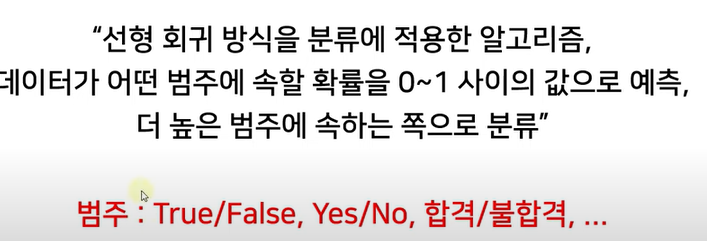

### 어떤 자격증시험의 합불합 데이터를 확인하고 공부시간에 따른 합불합여부를 예측하기

- 대충 어디서부터 어디까지는 합격이 확실, 불합격이 확실하다고 하면 이 범주에 있지 않은 나머지 데이터를 0으로 만드는 방법을 선택할 수 있다
### 이게 시그모이드함수(로지스틱 회귀)를 적용한 것 (s자 모양의 그래프)

### 방법

1. pandas, numpy, matplotlib을 import해오기
2. 가지고 있는 dataset을 불러오기
  - 이 때 x와 y를 분리해주면 됨 iloc를 이용해 위치 순으로 분리해도 되고 loc로 칼럼 단위로 분리해도 됨
3. 데이터를 x_train, y_train, x_test, y_test로 분리하기 -> sklearn.model_selection의 train_test_split을 import
  - 이 때 test_size와 random_state를 정해줘야한다. x_test, x_train을 만들 x값과 y_test와 y_train을 만들 y값도 사전에 정의해줘야 함
4. 로지스틱 모듈 가져오고 fit으로 학습하기
  - sklearn.linear_model에 있음 LogisticRegression임
5. 그리고 원하는 값을 넣어서 predict로 예측값 받아올 수 있음
  - 단, 이때 predict안에 넣을 결과를 원하는 값은 train한 dataset의 형태와 같아야 한다.
6. 예측값 전체 출력은 predict(x_test)로 할 수 있고 예측해달라고 넣은 x_test와 같은지를 비교하면 됨 
7. 당연히 모델의 정확도는 score(x_test, y_test) 로 가능하다

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv("LogisticRegressionData.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## 데이터분리

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

### 학습 (로지스틱 회귀 모델)

In [21]:
#로지스틱 모듈 가져오기
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

### 6시간 공부했을 때 예측?

In [22]:
classifier.predict([[6]])
# array[1] = 결과 1 : 합격할 것으로 예측

array([1], dtype=int64)

In [23]:
classifier.predict_proba([[6]]) # 합격할 확률 출력
# 불합격 확률 14%, 합격 확률 86%

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측?

In [17]:
classifier.predict([[4]])
# 결과 0 : 불합격할 것으로 예측

array([0], dtype=int64)

In [18]:
classifier.predict_proba([[4]]) # 합격할 확률 출력
# 불합격 확률 62%, 합격 확률 38%

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (테스트 세트)

In [30]:
y_pred = classifier.predict(x_test)
y_pred # 예측 값

array([1, 0, 1, 1], dtype=int64)

In [28]:
y_test # 실제 값 (테스트 세트)

array([1, 0, 1, 0], dtype=int64)

In [29]:
x_test # 실제 테스트 값의 공부 시간 (테스트 세트) 
#위의 값들과 비교해보면 8.6시간 공부한애는 합격할걸로 예측했고 실제로 합격했고
# 1.2시간 공부한 애는 불합격할 것으로 예측했고 실제로 불합격했고
# 마지막 4.5시간 공부한 애는 합격할 걸로 예측했지만 실제로는 불합격함

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [27]:
classifier.score(x_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 = 0.75

0.75

### 데이터 시각화 (훈련 세트)

### 방법
1. 우선 데이터를 나눠야 함. 직선으로 뚝뚝 끊기지 않기 위해
2. 함수를 만들기

In [38]:
#직선으로 그래프가 뚝뚝 끊기지않고 부드러운 곡선화하기 위해 데이터를 쪼개는 과정
X_range = np.arange(min(x), max(x), 0.1) # X 의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

- 위의 데이터에 따라 함수가 시그모이드 형태로 변하기를 원하고 그걸 그래프로 출력하길 원함

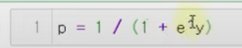

- 이거 만들거임 (아래식 확인)

In [39]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
# exp안에 -y값을 넣어줘야 함
# y = mx + b
# m = classifier.coef_ (기울기 구하는 식)
# b = classifier.intercept_ (y절편 구하는 식) 
p

array([[0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
        0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
        0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
        0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
        0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
        0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
        0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
        0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
        0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
        0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
        0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
        0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
        0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
        0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
        0.97175136, 0.97475939, 0.97745455, 0.97

In [40]:
p.shape

(1, 95)

In [41]:
X_range.shape
# 위의 y결과값은 2차원인데 x는 1차원임 둘의 차원을 맞춰줘야 함

(95,)

In [42]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(95,)

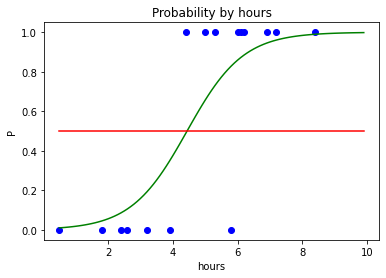

In [47]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기 # 중간 빨간선
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화 (테스트 세트)

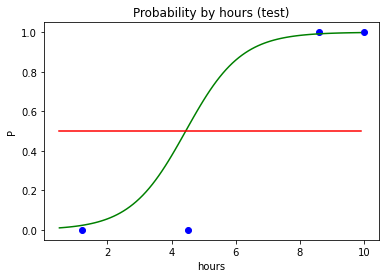

In [20]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [49]:
classifier.predict_proba([[4.5]]) 
# 4.5 시간 공부했을 때 불합할 확률 48%, 합격할 확률 51%확률 
# (모델에서는 51% 확률로 합격 예측, 실제로는 불합격)
# 예측이 맞지 않았다

array([[0.48310686, 0.51689314]])

### 혼동 행렬 (Confusion Matrix)

- 4방면으로 표현

In [52]:
# TRUE NEGATIVE (TN)       FALSE POSITIVE (FP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 불합격 (실제)             불합격 (실제)

# FALSE NEGATIVE (FN)      TRUE POSITIVE (TP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 합격 (실제)               합격 (실제)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # 실제데이터, 예측했던 데이터 넣기
cm

#맞는예측과 틀린 예측을 쉽게 볼 수 있음
# 좌측 1은 불합격할거라 예측하고 실제로도 불합격한 수가 1개라는 의미
# 우측 1은 합격일거라 예측하고 실제론 불합격한 수가 총 1개다
# 좌측 0은 불합격일거라 예측하고 합격인 경우는 0개 즉, 없다는 의미
# 우측 2는 합격일거라 예측하고 실제로도 합격인 경우가 2개있다는 의미



array([[1, 1],
       [0, 2]], dtype=int64)